In [123]:
import numpy as np
import pandas as pd
import datetime

In [124]:
path='/Users/zhongyaode/Desktop/kaggle-data/'
df=pd.read_csv(path+'database.csv')

In [125]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


指标一：平均每年发生多少次;
指标二：年均的级数,；
指标三：级数大于平均级数的总次数；
指标五：地震趋势；
把Date转换成日期格式
magnitude-地震级数；Depth-地震深度；Magnitude Typ-地震类型

In [126]:
df['Date']=pd.to_datetime(df['Date'])

In [127]:
df.iloc[0,0]

Timestamp('1965-01-02 00:00:00')

In [128]:
start_date=df.iloc[0,0]
end_date=df.iloc[-1,0]

In [129]:
print start_date

1965-01-02 00:00:00


In [130]:
print end_date

2016-12-30 00:00:00


In [131]:
delta=(end_date-start_date)/np.timedelta64(1,'D')
#delta=(endTime-startTime)/np.timedelta64(1,'D')
year=delta/365
delta

18990.0

In [132]:
year

52.027397260273972

In [133]:
count=len(df['Time'])
count

23412

In [134]:
#平均每年发生多少次
year_cishu=count/year
year_cishu

449.99368088467617

In [135]:
#这里可以看出每年平均发生450次地震

In [140]:
print df['Magnitude'].sum()

137721.81


In [151]:
total=0
for  x in df['Magnitude']:
    total=total+x
print total

137721.81


In [156]:
#平均每次的地震级数
pingjunjishu=total/count
pingjunjishu

5.8825307534600029

In [157]:
#可以看出每年平均发生500次，每次地震的平均级数是5.88级


In [158]:
cishu=0
for x in df['Magnitude']:
    if x >pingjunjishu:
        x=1
        cishu+=1

print cishu

9304


In [159]:
dayu7=0
for x in df['Magnitude']:
    if x >7:
        x=1
        dayu7+=1

print dayu7

570


In [161]:
dayu8=0
for x in df['Magnitude']:
    if x >8:
        x=1
        dayu8+=1

print dayu8

27


In [162]:
dayu9=0
for x in df['Magnitude']:
    if x >9:
        x=1
        dayu9+=1

print dayu9

2


In [ ]:
#有9304的地震大于平均级数
#有570次大于7级
#27次大于8级
#两次大于9级

In [163]:
#画级数的直方图，动态分布图，

In [164]:
import matplotlib.pyplot as plt
from scipy import stats

In [165]:
size_data=df['Magnitude']
size_data.shape


(23412,)

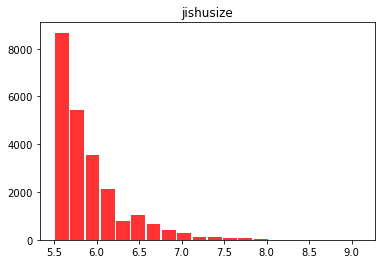

In [173]:
fig=plt.figure()
x=df['Magnitude']
ax=fig.add_subplot(111)
numBins=20
ax.hist(x,numBins,color='red',alpha=0.8,rwidth=0.9)
plt.title(u'jishusize')
plt.show()

In [174]:
#级数的动态分布
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'
def normfun(x,mu,sigma):
    pdf=np.exp(-((x-mu)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
    return pdf

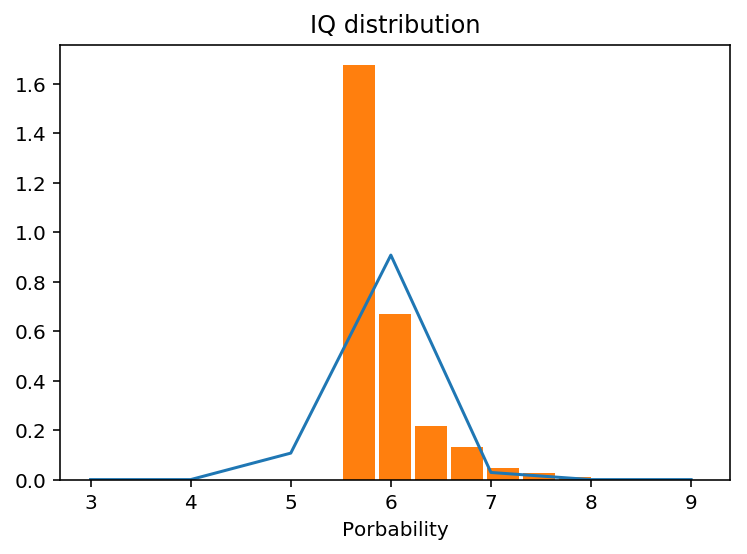

In [176]:
mean=df['Magnitude'].mean()
std=df['Magnitude'].std()
x=np.arange(3,10,1)
y=normfun(x,mean,std)
plt.plot(x,y)
plt.hist(df['Magnitude'],bins=10,rwidth=0.9,normed=True)
plt.title('IQ distribution')
plt.xlabel('Porbability')
plt.show()

In [180]:
def trendF(dataframe):
    trend=dataframe.loc[:,['Date','Magnitude']]
    trend['date']=pd.to_datetime(trend['Date'])
    trend=trend.set_index('Date')
    #按周分割并计算周消费总和
    s=trend['Magnitude'].resample('Y').sum()
    trendNew=pd.Series.to_frame(s)
    #index format 将年月日改为年周
    trendNew.index=trendNew.index.format(formatter=lambda x:x.strftime('%y'))
    print (df1)
    trendNew.plot()


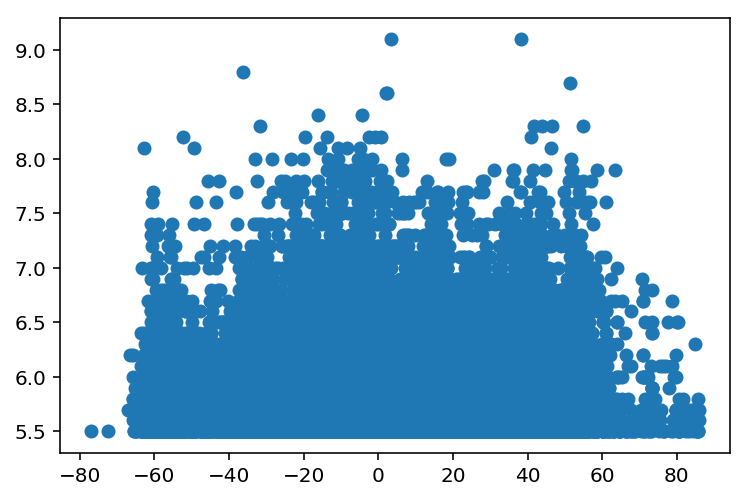

In [183]:
#自变量是纬度，因变量为地震级数的散点图（气泡的大小可以弄个变量哦）；
#简单的数据预处理和分析，下次继续改进哈
plt.scatter(df['Latitude'],df['Magnitude'])

In [184]:
#地震与时间的趋势图


In [190]:
dny_ts=df.ix[['Magnitude'],'Date'].T

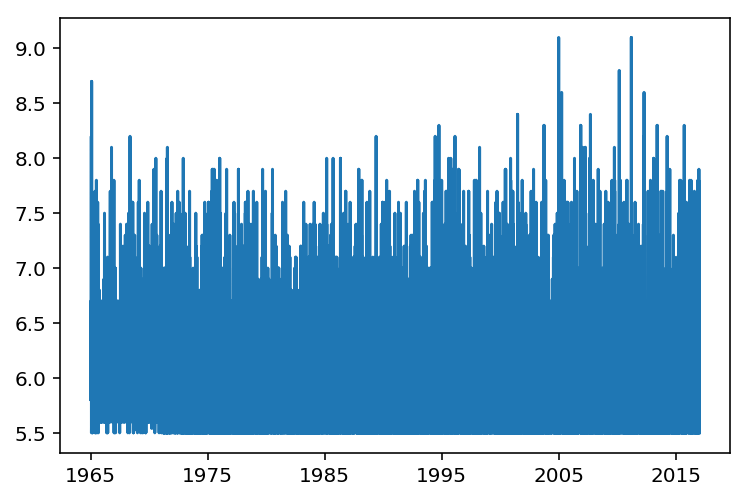

In [206]:
pl.plot(b,c)

In [204]:
%matplotlib inline
import matplotlib.pyplot as plt